# Import Libraries

In [170]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

# Load data

In [175]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [177]:
df.shape

(178, 14)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [181]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [183]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [185]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [187]:
df.duplicated().sum()

0

<Figure size 6000x3000 with 0 Axes>

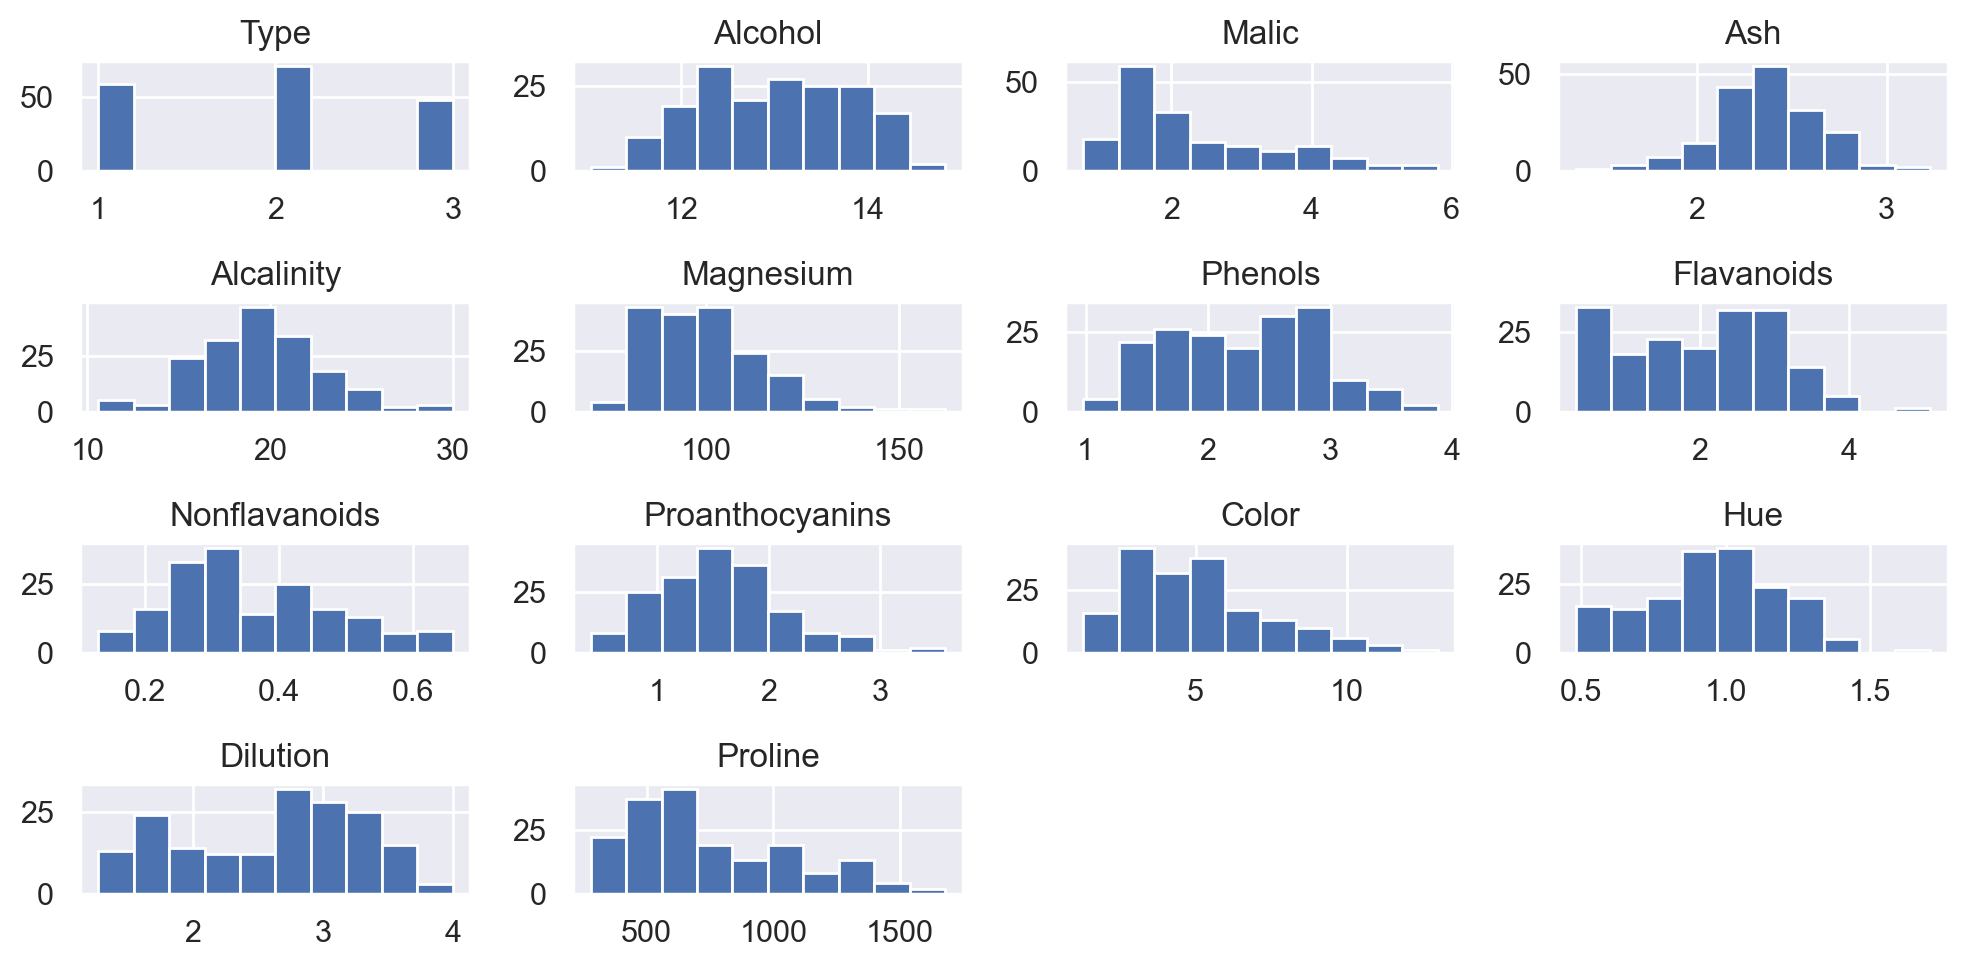

In [189]:
plt.figure(figsize=(30,15))
df.hist()
plt.tight_layout()
plt.show()

In [ ]:
'''
Alcohol, Ash, and Hue has fairly normal distributions.

Malic and Color are positively skewed.

Proline highly skewed with a few outliers.

Flavanoids and Phenols show multimodal patterns.
'''

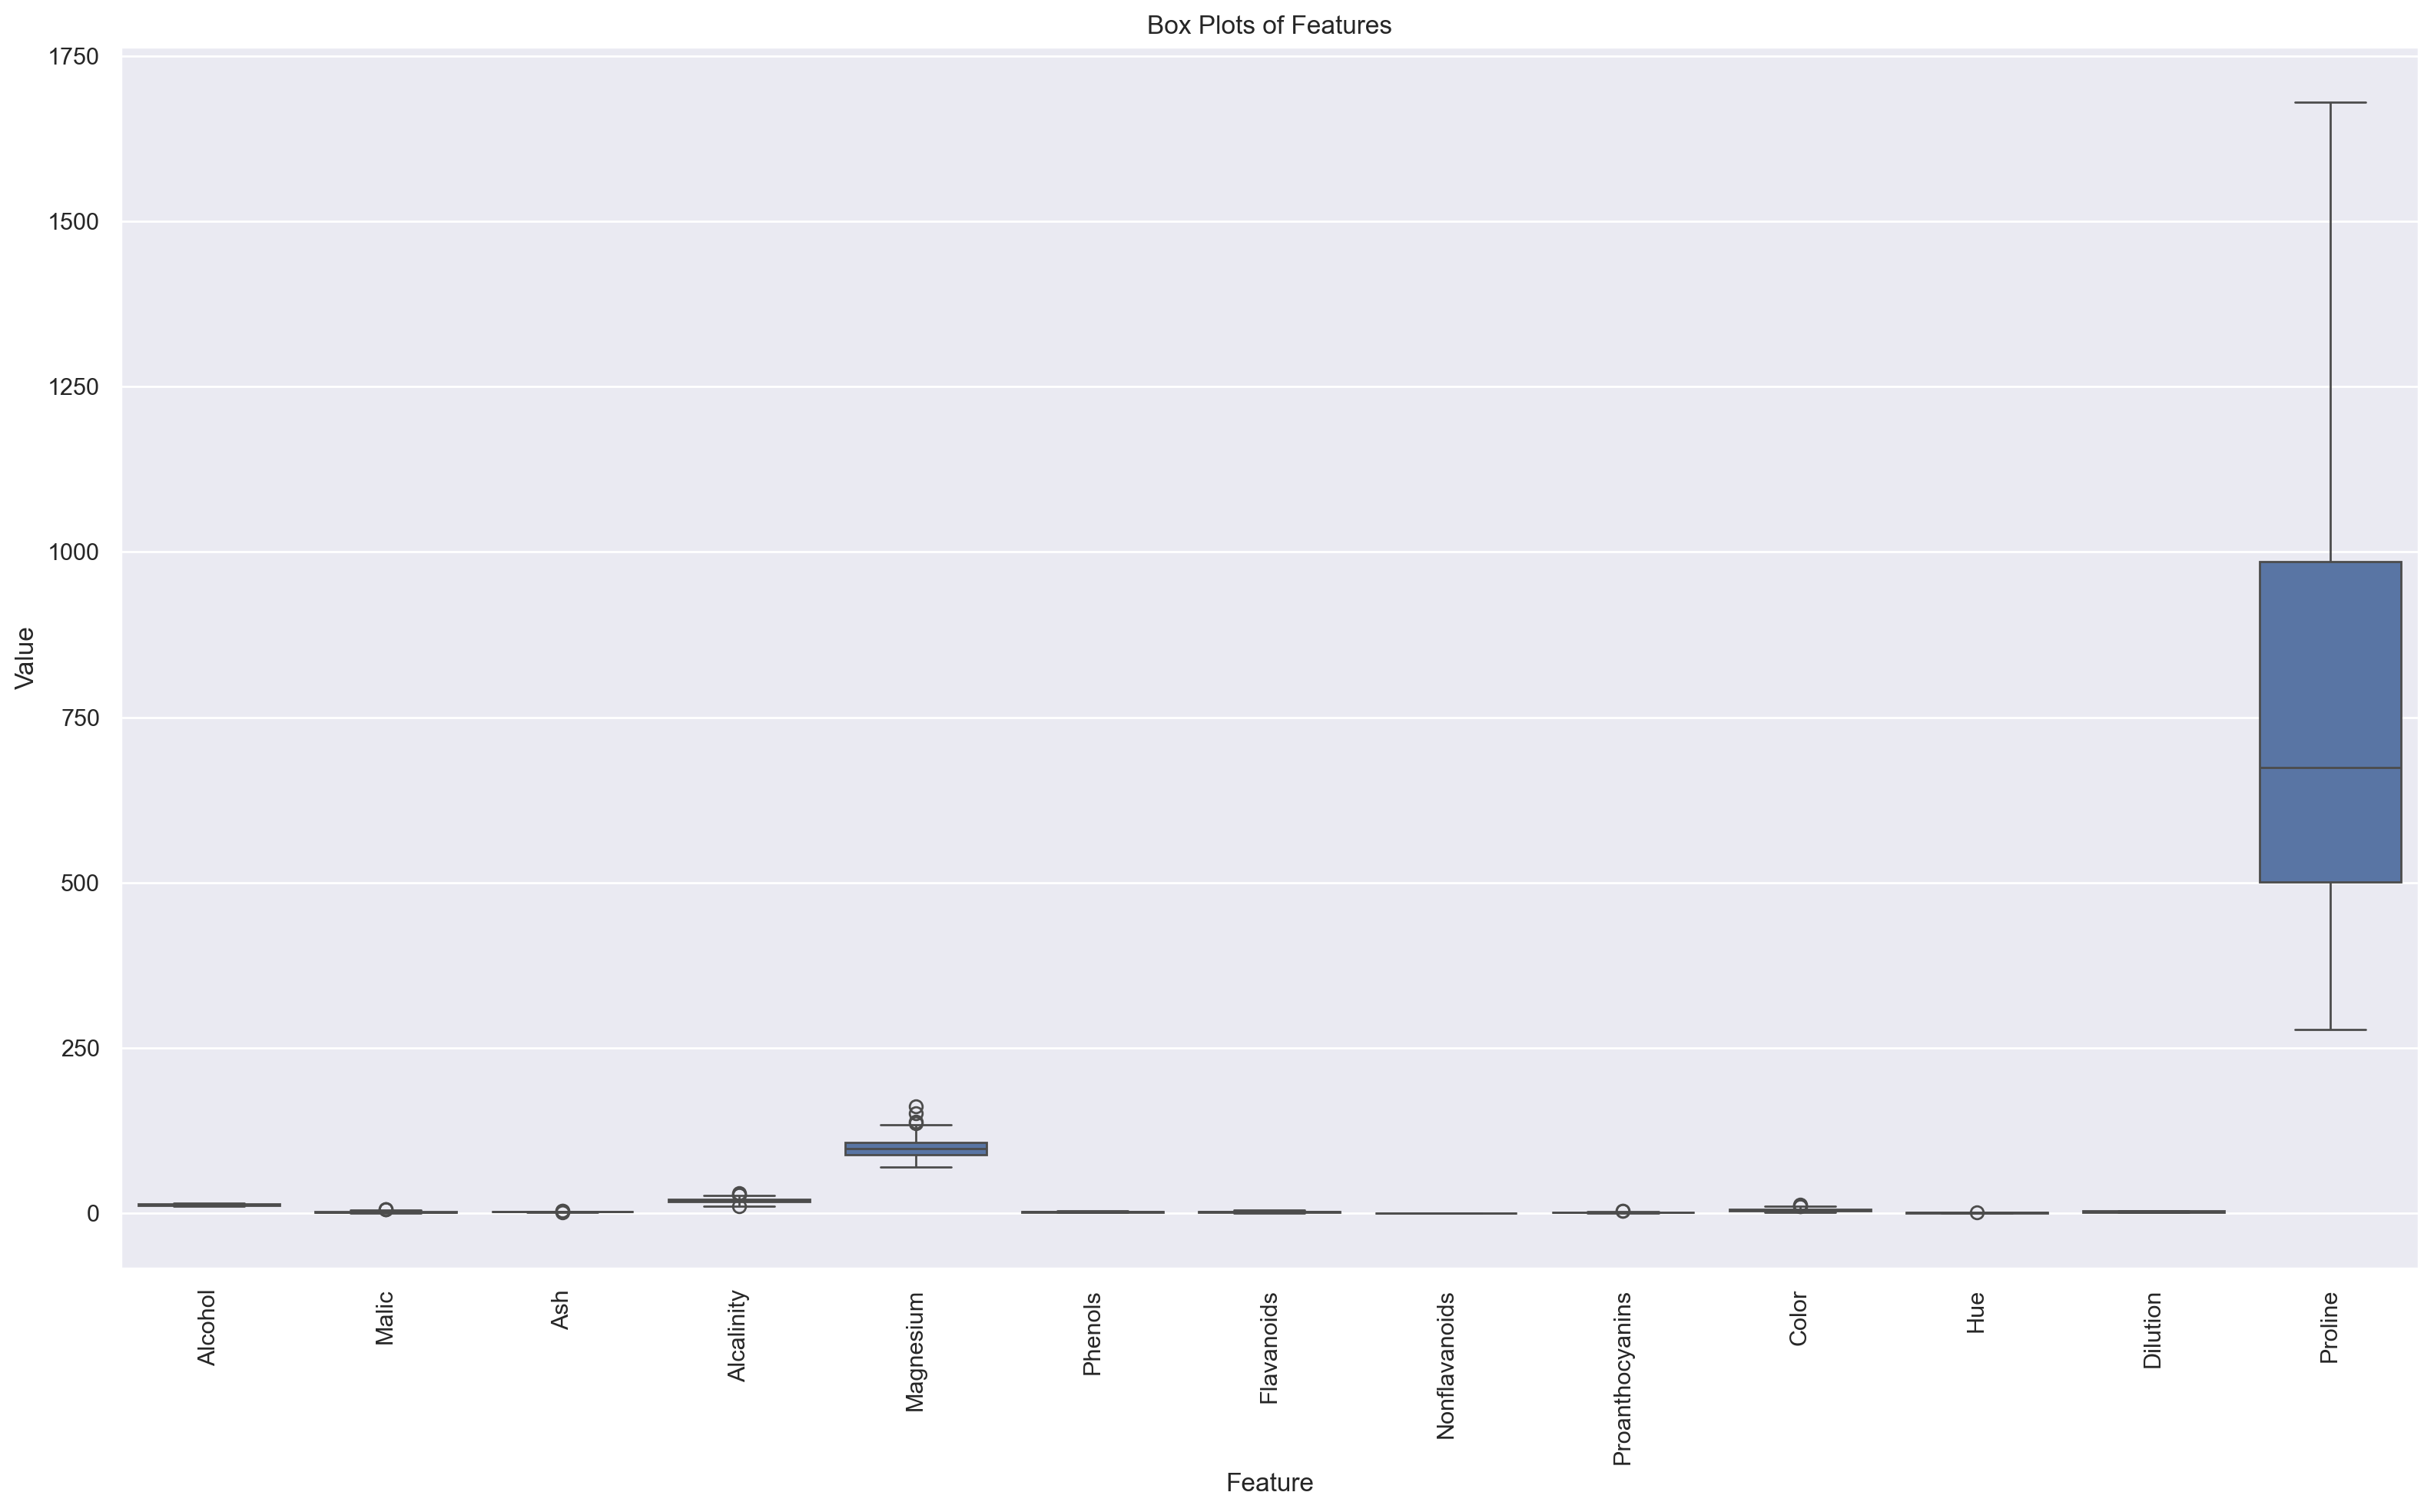

In [191]:
plt.figure(figsize=(16, 10))
df_melted = df.drop('Type', axis=1).melt(var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.xticks(rotation=90)
plt.title('Box Plots of Features')
plt.tight_layout()
plt.show()

In [ ]:
#observe that several features have outliers, while Proline has a wide range of values.

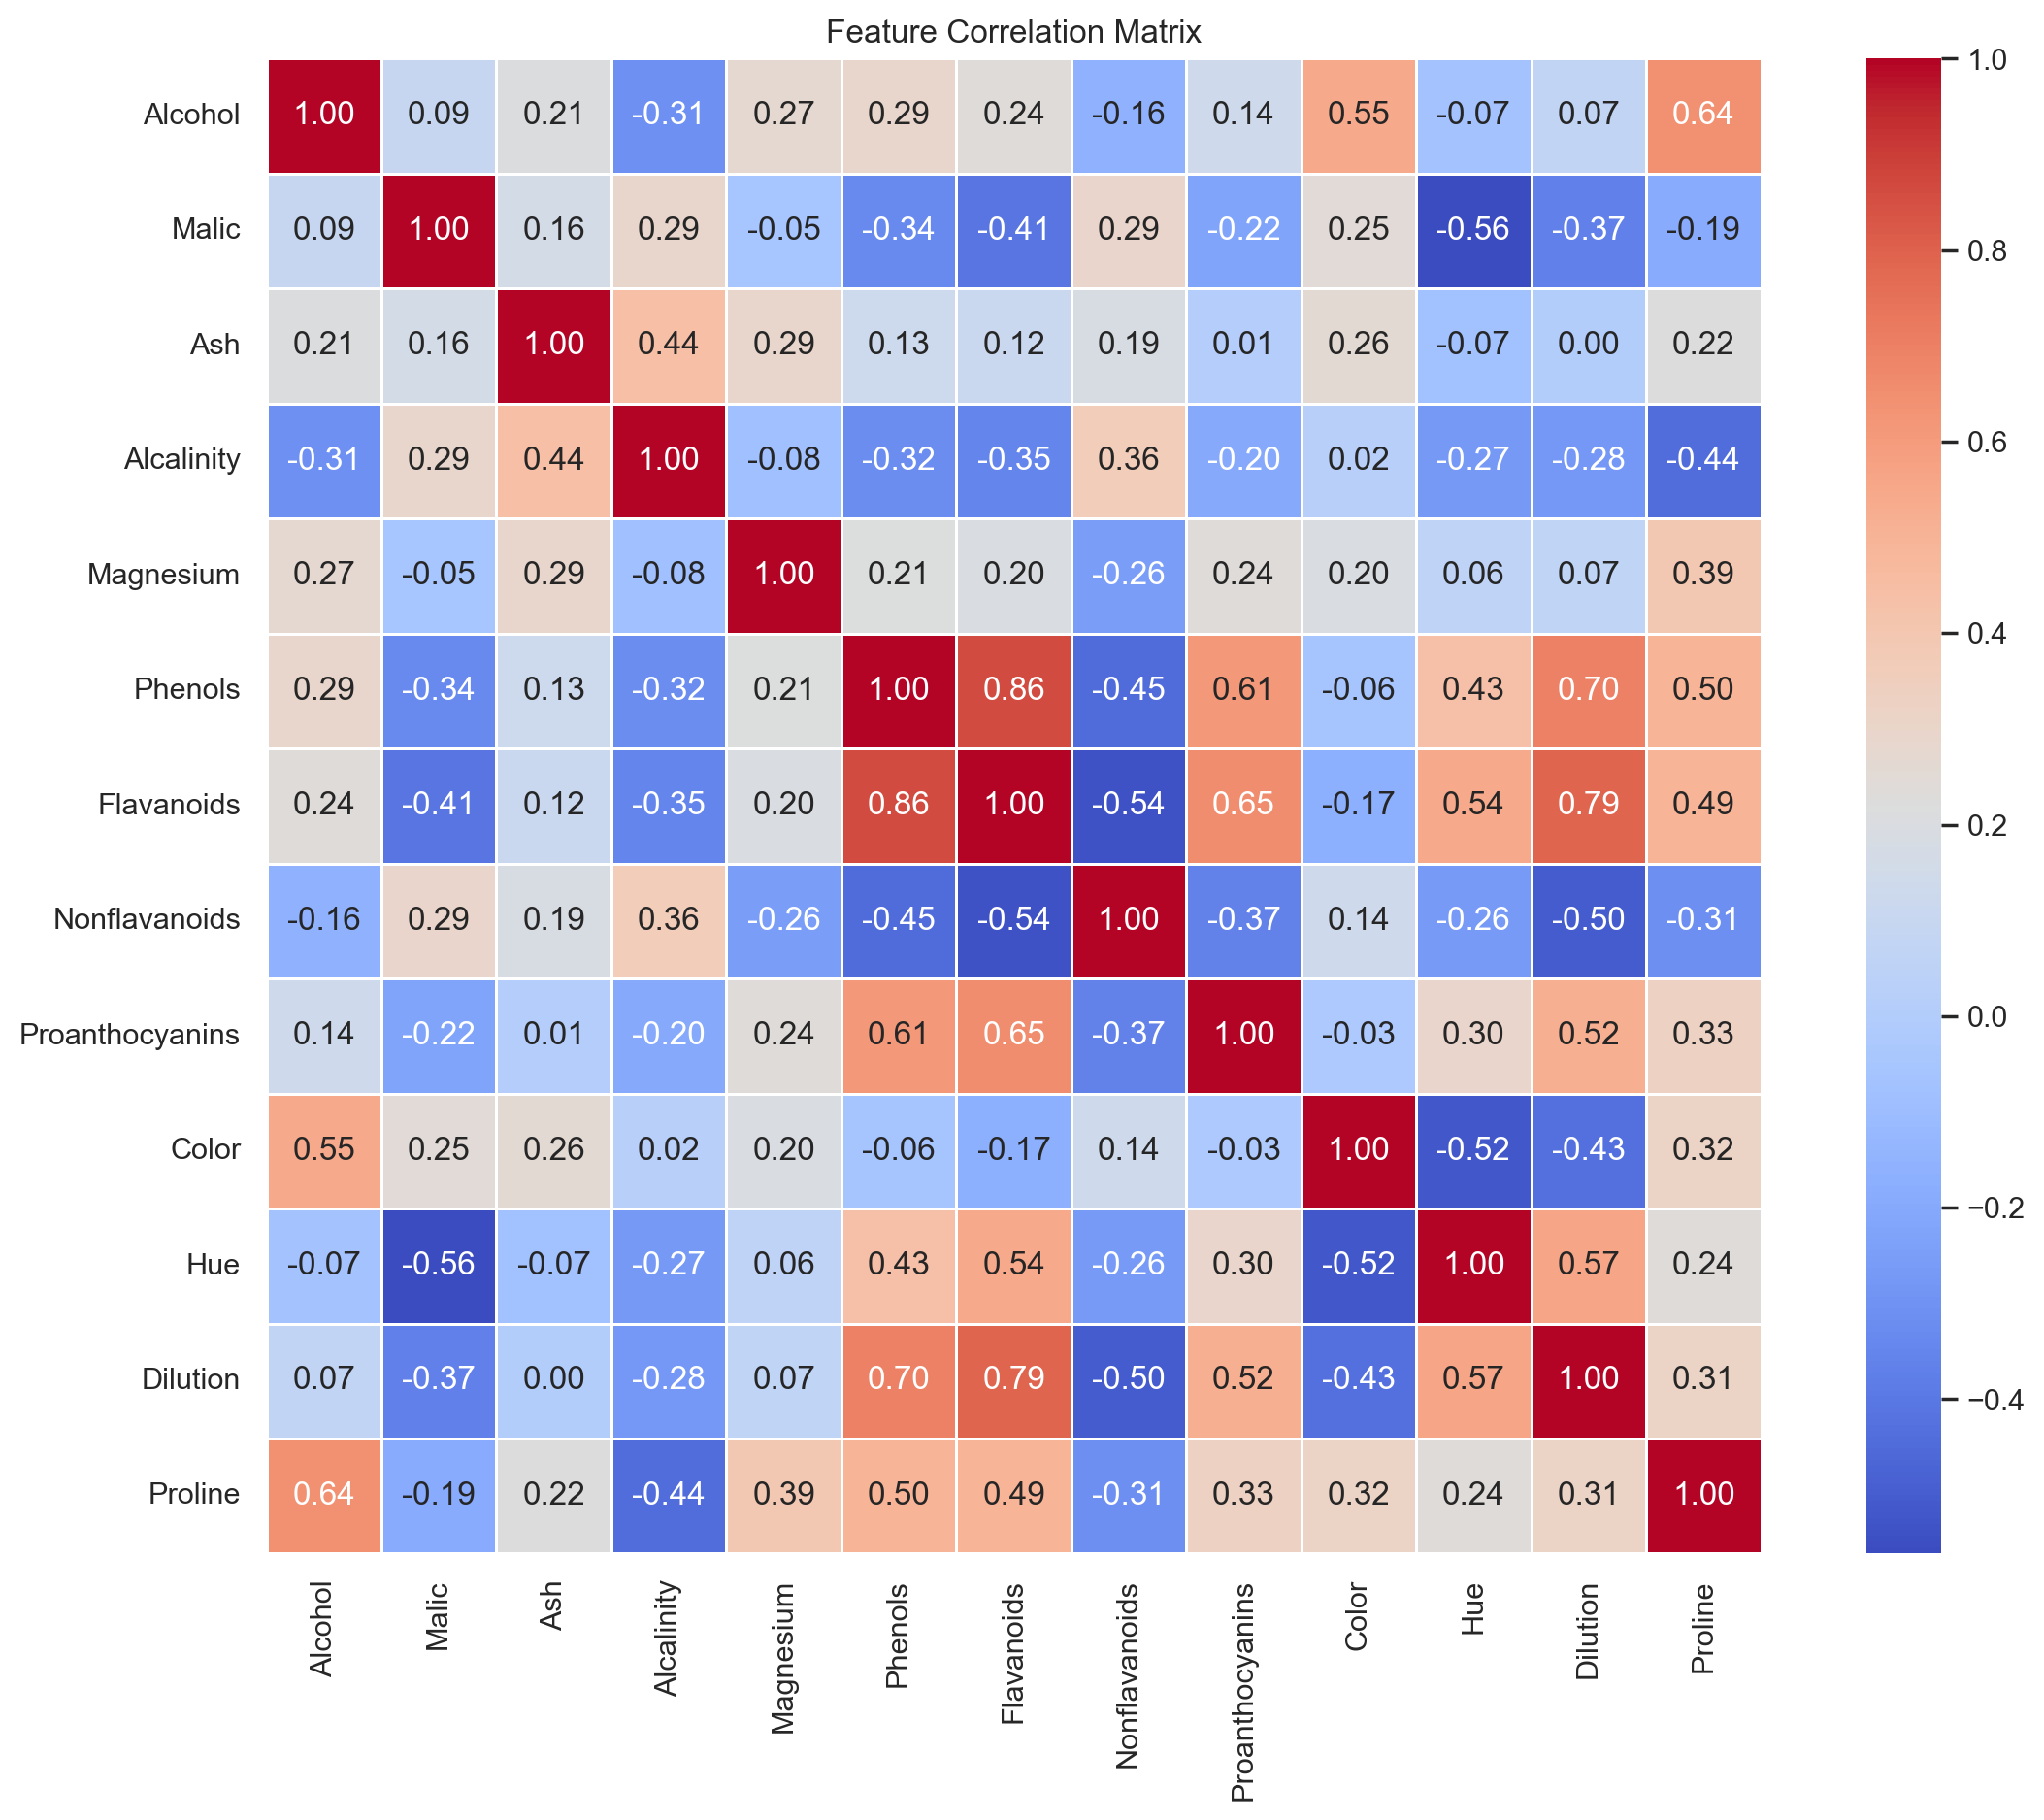

In [193]:
plt.figure(figsize=(14, 10))
corr_matrix = df.drop('Type', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [63]:
# features like phenols with Flavanoids are highly corelated after that flavanoids with dulution highly corelated

# Task 2

In [195]:
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [197]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

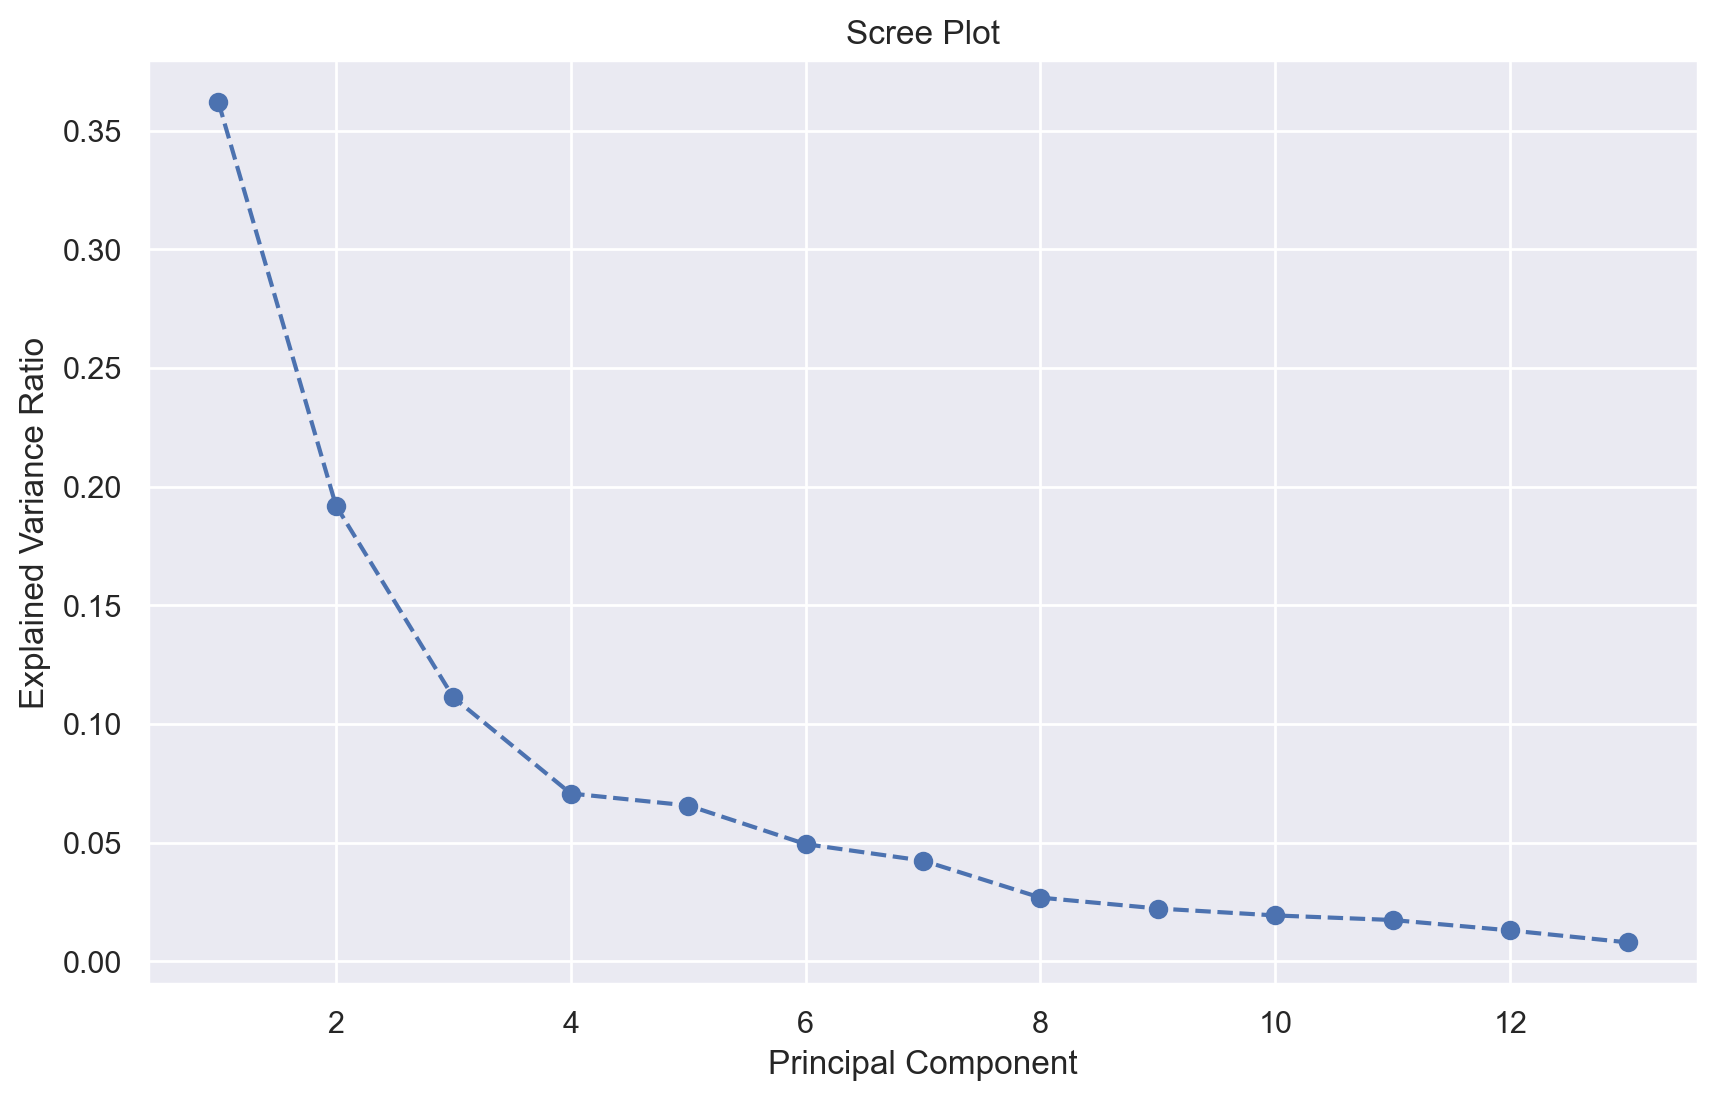

In [199]:
plt.figure(figsize=(10, 6))
explained_var = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

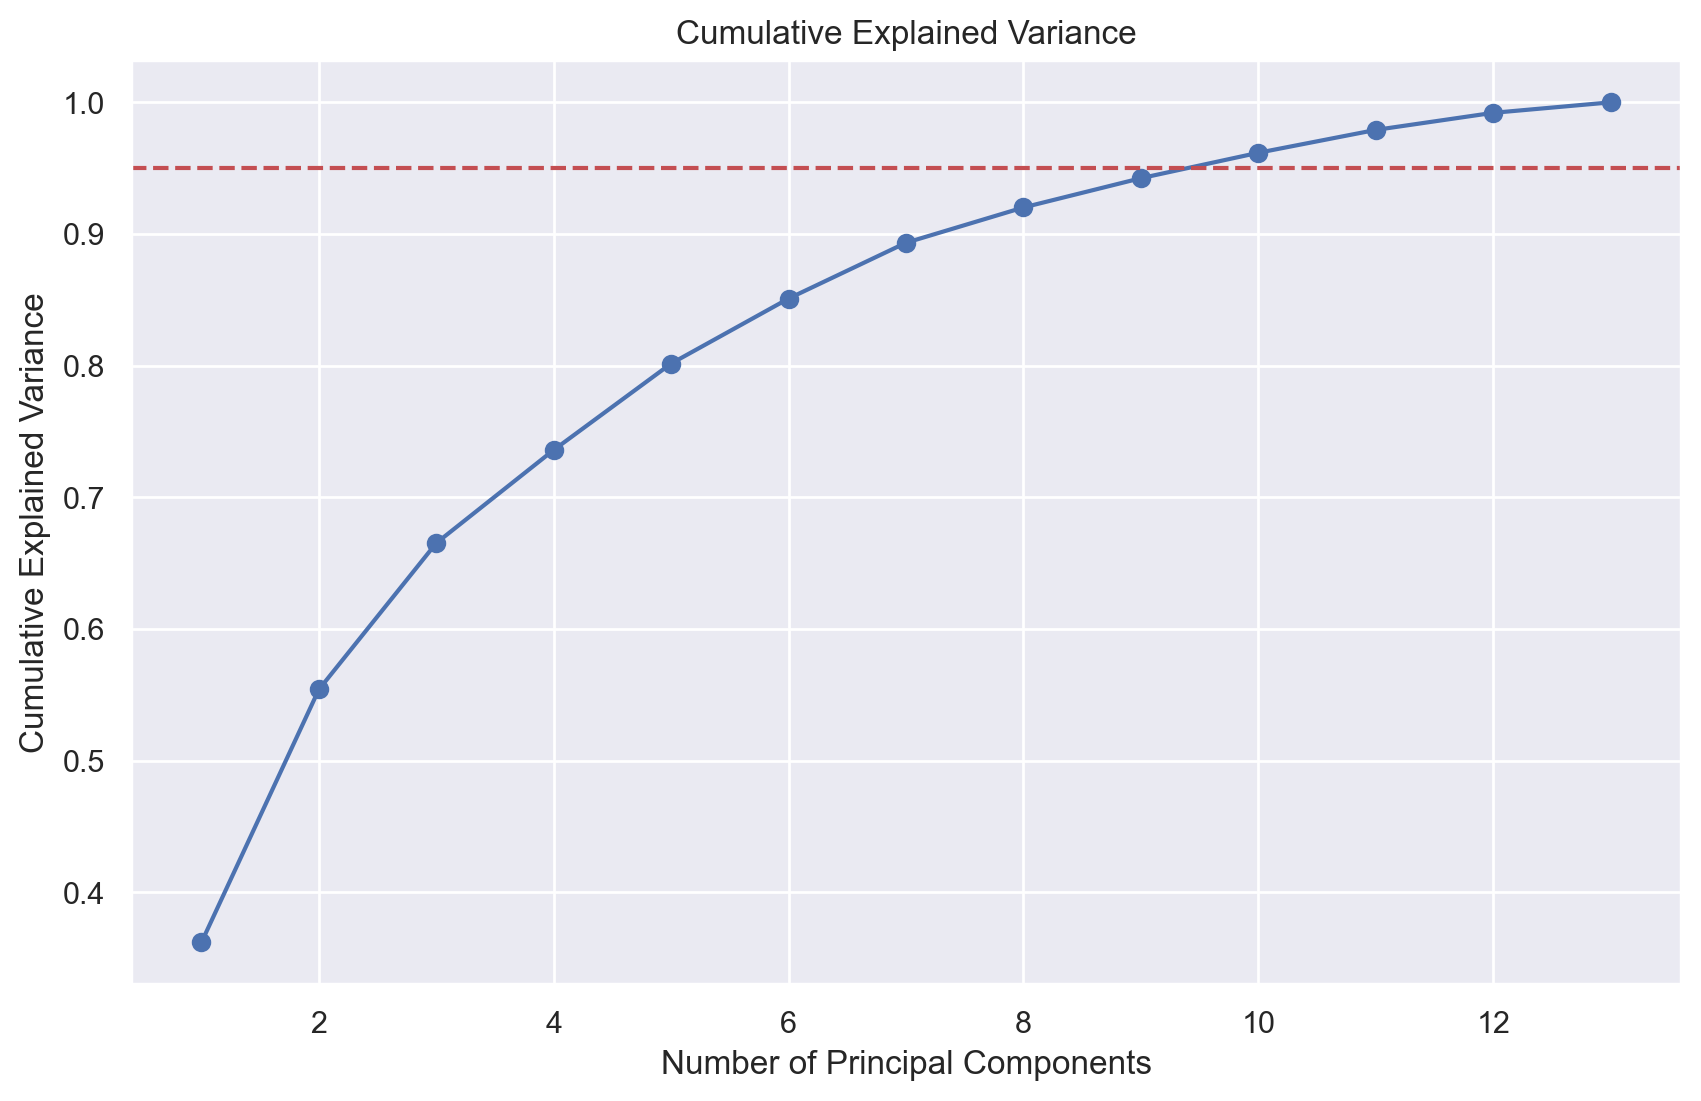

In [201]:
plt.figure(figsize=(10, 6))
cumulative_var = np.cumsum(explained_var)
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [203]:
n_components = np.argmax(cumulative_var >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

Number of components to explain 95% variance: 10


In [205]:
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

# Task 3

In [207]:
from sklearn.cluster import KMeans

C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with M

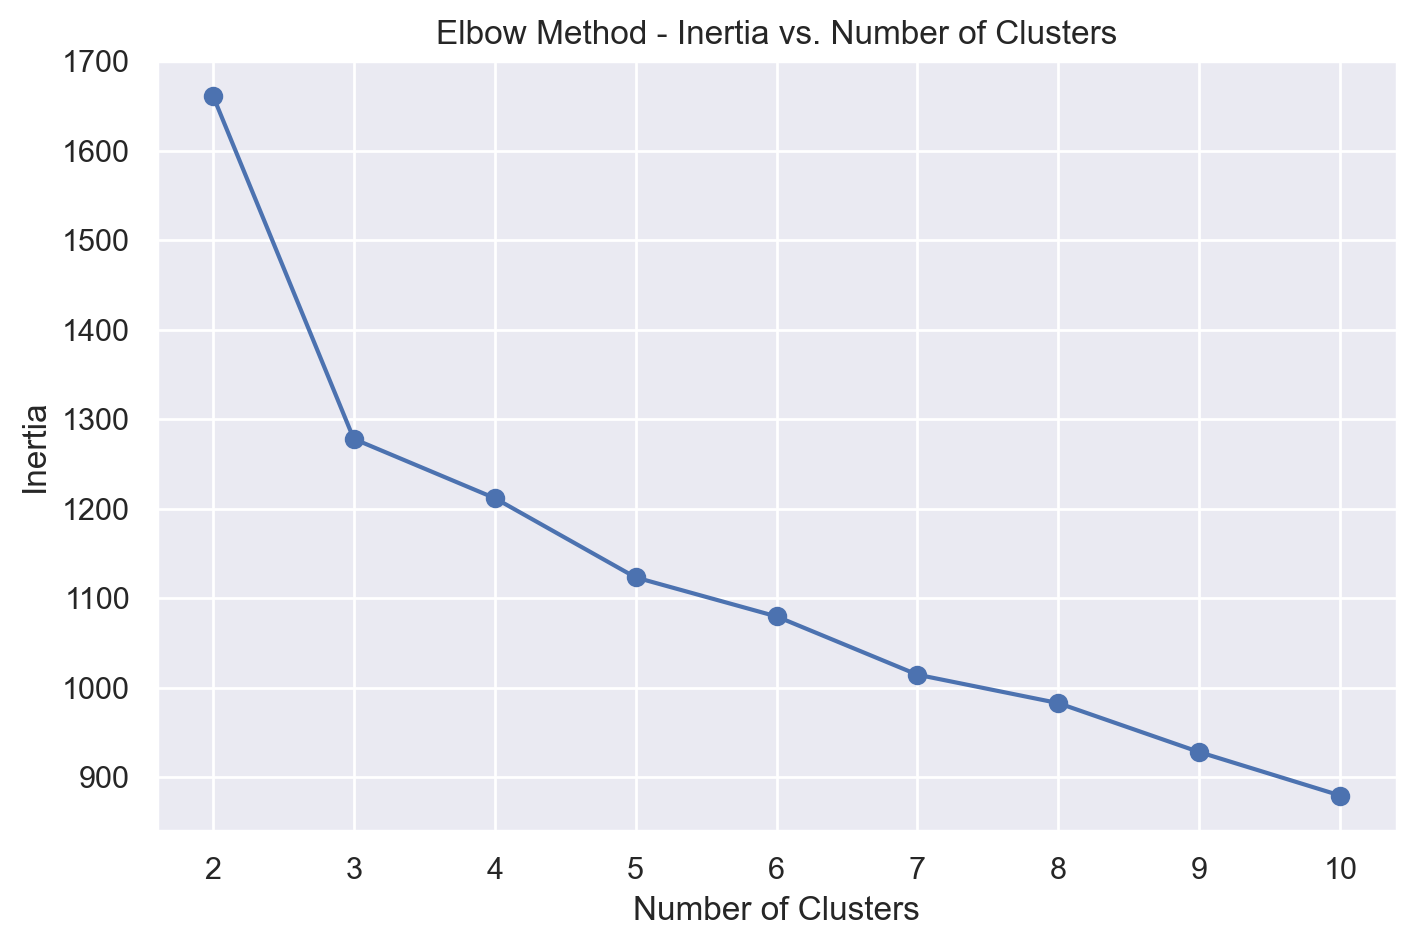

In [209]:
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [211]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [213]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


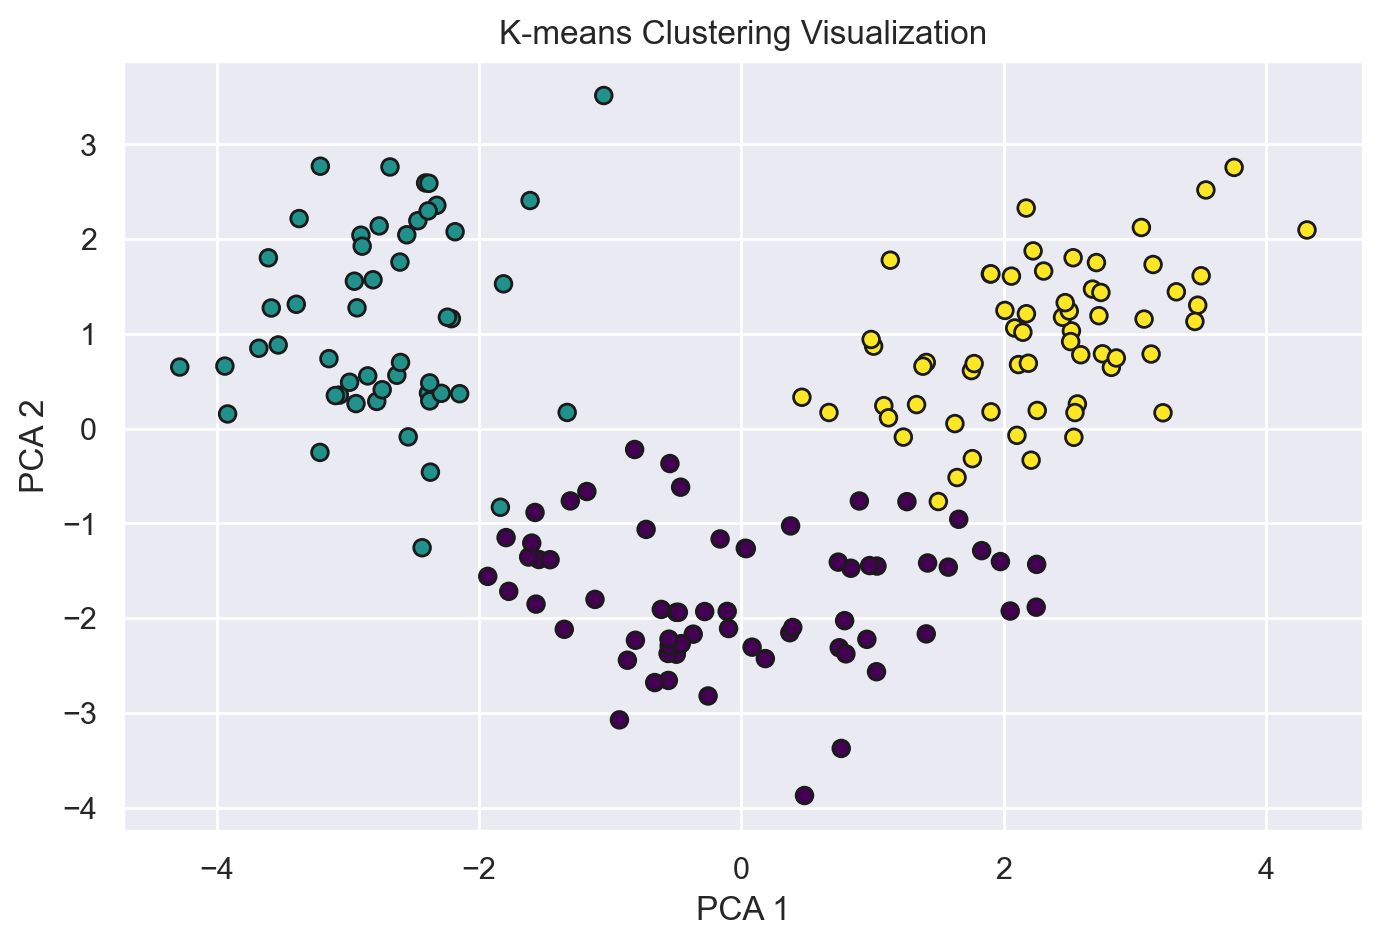

In [215]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('K-means Clustering Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [217]:
from sklearn.metrics import silhouette_score


In [219]:
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette:.4f}")



Silhouette Score: 0.2849


In [ ]:
#silhouette score is 0.2849

# Task 4

In [221]:
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
X_pca_df['Type'] = y

In [223]:
X_pca_features = X_pca_df.drop('Type', axis=1)

In [225]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca_features)

C:\Users\bcs\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [227]:
X_pca_df['Cluster'] = cluster_labels_pca


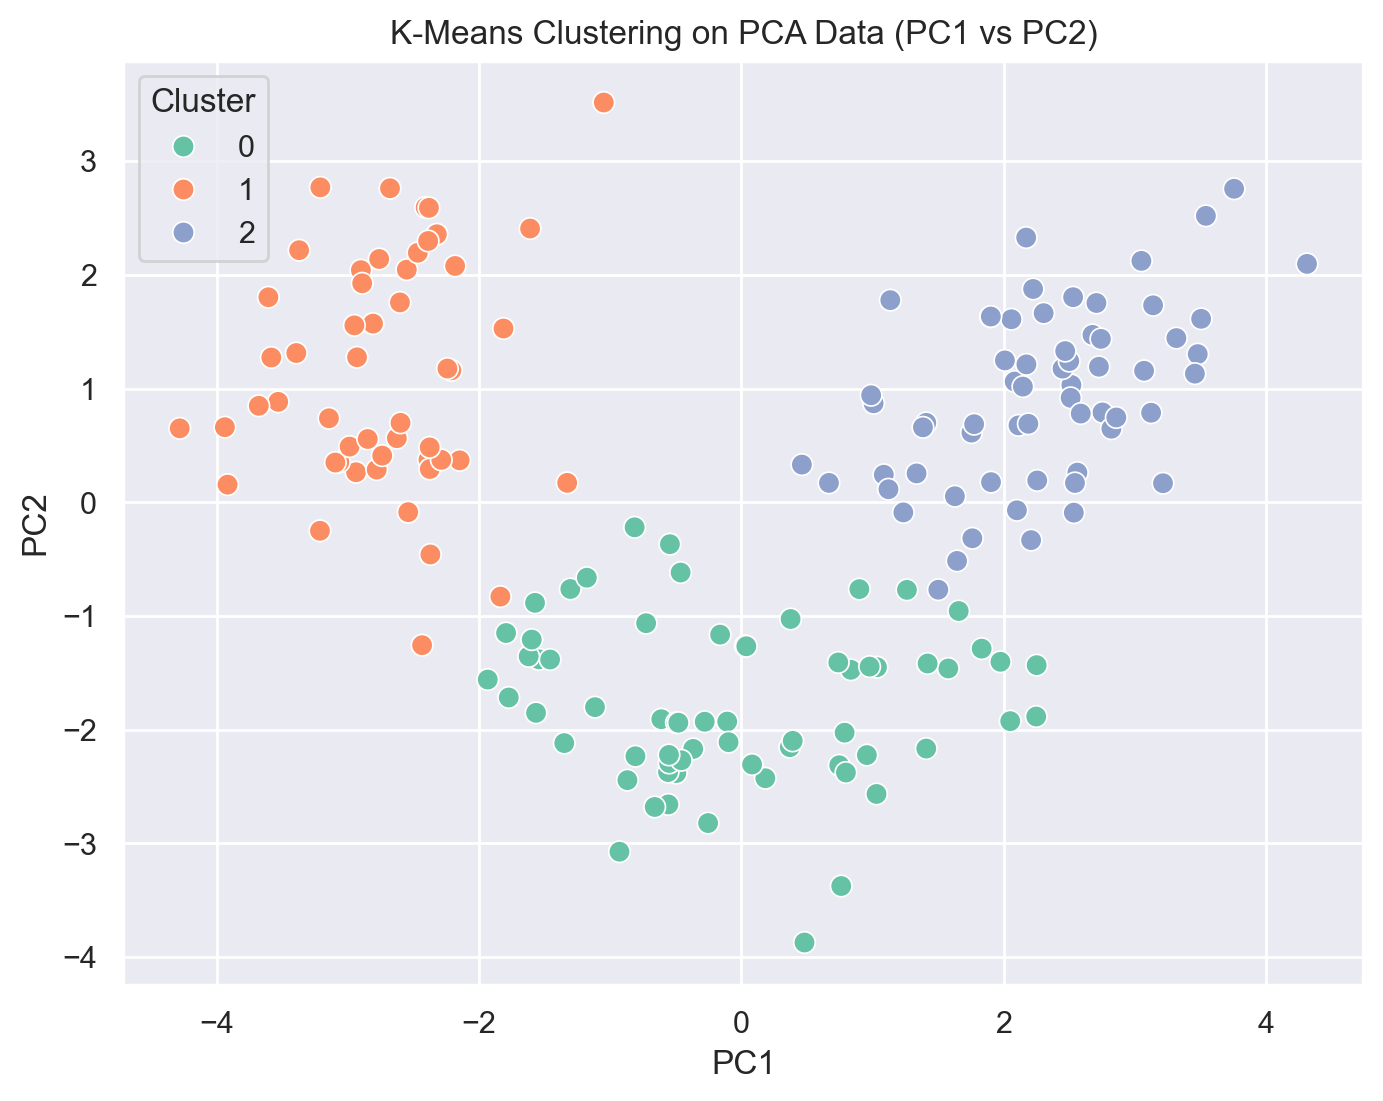

In [229]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_df['PC1'], y=X_pca_df['PC2'],
    hue=X_pca_df['Cluster'], palette='Set2', s=60
)
plt.title('K-Means Clustering on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [231]:
sil_score_pca = silhouette_score(X_pca_features, cluster_labels_pca)
print(f"Silhouette Score (PCA): {sil_score_pca:.4f}")

Silhouette Score (PCA): 0.2987


In [ ]:
#silhouette score on PCA data is 0.2987 which is slightly better then original data.

# Task 5

In [ ]:
# Comparison and Analysis

In [ ]:
'''
Clustering on original data gave a silhouette score of 0.2849
Clustering on PCA-transformed data gave a slightly better silhouette score of 0.2987

The PCA has slightly better separation clusters.
Clusters shapes and groupings are clear in PCA version.
'''

# Task 6

In [ ]:
# Conclusion and Insights

In [ ]:
'''
some features has outliers and multi-peak distribution.

PCA reduced the number of features

Clustering worked slightly better in PCA-transformed data.

PCA is helphul when there are too many features

If the dataset is large or complex and want to improve perormance or make visual plots then we should use PCA before clustering.

And If dataset is already small or clean and need to understand which variables are important we should use original features.
'''